6. Derivative of Gaussian:

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
def get_derivative_kernels(size, sigma):    
    k = size // 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))        
    G = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))        
    Gx = (-x / (sigma**2)) * G       
    Gy = (-y / (sigma**2)) * G
    
    return Gx, Gy, x, y

In [10]:
filename = 'runway.png' 
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

(b) Using NumPy, compute normalized 5×5 kernels corresponding to the derivatives of a
Gaussian for σ=2 in the x- and y-directions.

In [11]:
sigma = 2
Gx_5, Gy_5, _, _ = get_derivative_kernels(size=5, sigma=sigma)

print("Part (b) - Kernel Gx (Horizontal Derivative):")
print(np.round(Gx_5, 4))

Part (b) - Kernel Gx (Horizontal Derivative):
[[ 0.0073  0.0053  0.     -0.0053 -0.0073]
 [ 0.0106  0.0077  0.     -0.0077 -0.0106]
 [ 0.0121  0.0088  0.     -0.0088 -0.0121]
 [ 0.0106  0.0077  0.     -0.0077 -0.0106]
 [ 0.0073  0.0053  0.     -0.0053 -0.0073]]


(c) Visualize a 51×51 derivative-of-Gaussian kernel (for either the x or y direction) as a
3D surface plot, where the kernel coefficients represent the height.

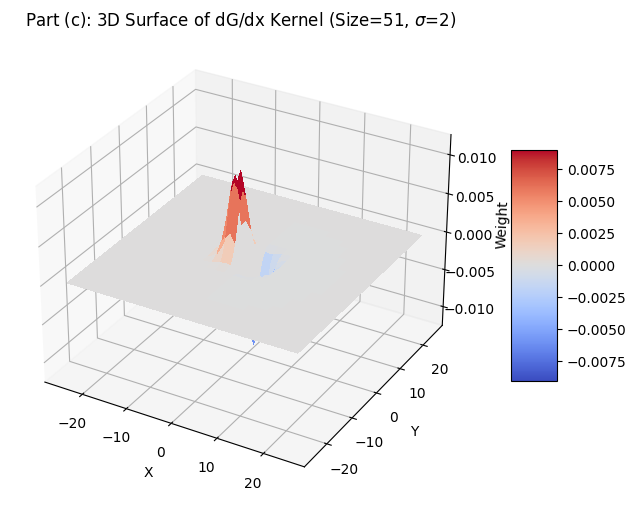

In [12]:
Gx_51, Gy_51, X, Y = get_derivative_kernels(size=51, sigma=sigma)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Gx_51, cmap='coolwarm', linewidth=0, antialiased=False)

ax.set_title(f'Part (c): 3D Surface of dG/dx Kernel (Size=51, $\sigma$={sigma})')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Weight')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

(d) Apply the computed derivative-of-Gaussian kernels to a given grayscale image to obtain
the image gradients in the horizontal and vertical directions.

In [13]:
grad_x_man = cv2.filter2D(image, cv2.CV_64F, Gx_5)
grad_y_man = cv2.filter2D(image, cv2.CV_64F, Gy_5)

abs_grad_x_man = cv2.convertScaleAbs(grad_x_man)
abs_grad_y_man = cv2.convertScaleAbs(grad_y_man)

(e) Using OpenCV, compute the image gradients by applying cv.Sobel(). Compare the
results with those obtained above and comment on any observed differences.

In [14]:
grad_x_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
grad_y_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

abs_grad_x_sobel = cv2.convertScaleAbs(grad_x_sobel)
abs_grad_y_sobel = cv2.convertScaleAbs(grad_y_sobel)

--- Visualization & Comparison ---

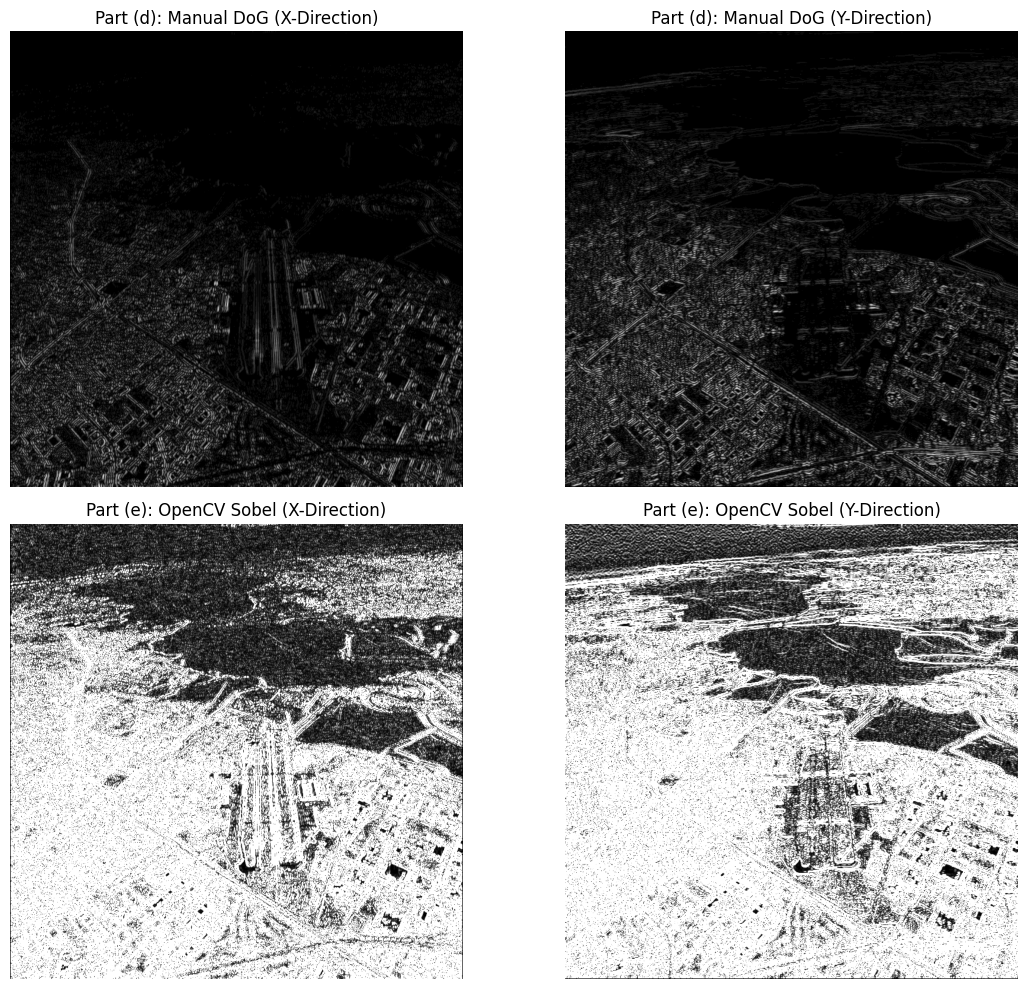

In [15]:
plt.figure(figsize=(12, 10))

# Manual X
plt.subplot(2, 2, 1)
plt.imshow(abs_grad_x_man, cmap='gray')
plt.title('Part (d): Manual DoG (X-Direction)')
plt.axis('off')

# Manual Y
plt.subplot(2, 2, 2)
plt.imshow(abs_grad_y_man, cmap='gray')
plt.title('Part (d): Manual DoG (Y-Direction)')
plt.axis('off')

# Sobel X
plt.subplot(2, 2, 3)
plt.imshow(abs_grad_x_sobel, cmap='gray')
plt.title('Part (e): OpenCV Sobel (X-Direction)')
plt.axis('off')

# Sobel Y
plt.subplot(2, 2, 4)
plt.imshow(abs_grad_y_sobel, cmap='gray')
plt.title('Part (e): OpenCV Sobel (Y-Direction)')
plt.axis('off')

plt.tight_layout()
plt.show()